In [24]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [25]:
n, m = 6, 8  # number of rows and columns respectively.

In [26]:
# Random obstacles for this example. 
grid = np.zeros((n, m))

In [27]:
position = list()
for i in range(n):
    position_row = list()
    for j in range(m):
        position_row.append([(-1.0+0.7*j), (1-0.7*i)])
    position.append(position_row)
print(position)

[[[-1.0, 1.0], [-0.30000000000000004, 1.0], [0.3999999999999999, 1.0], [1.0999999999999996, 1.0], [1.7999999999999998, 1.0], [2.5, 1.0], [3.1999999999999993, 1.0], [3.8999999999999995, 1.0]], [[-1.0, 0.30000000000000004], [-0.30000000000000004, 0.30000000000000004], [0.3999999999999999, 0.30000000000000004], [1.0999999999999996, 0.30000000000000004], [1.7999999999999998, 0.30000000000000004], [2.5, 0.30000000000000004], [3.1999999999999993, 0.30000000000000004], [3.8999999999999995, 0.30000000000000004]], [[-1.0, -0.3999999999999999], [-0.30000000000000004, -0.3999999999999999], [0.3999999999999999, -0.3999999999999999], [1.0999999999999996, -0.3999999999999999], [1.7999999999999998, -0.3999999999999999], [2.5, -0.3999999999999999], [3.1999999999999993, -0.3999999999999999], [3.8999999999999995, -0.3999999999999999]], [[-1.0, -1.0999999999999996], [-0.30000000000000004, -1.0999999999999996], [0.3999999999999999, -1.0999999999999996], [1.0999999999999996, -1.0999999999999996], [1.799999

In [28]:
grid[0][3] = 1
position[0][3] = 1

grid[0][5] = 1
position[0][5] = 1

grid[1][4] = 1
position[1][4] = 1

grid[2][0] = 1
position[2][0] = 1

grid[3][7] = 1
position[3][7] = 1

grid[4][2] = 1
position[4][2] = 1

grid[4][4] = 1
position[4][4] = 1

grid[5][5] = 1
position[5][5] = 1

grid[5][2] = 1
position[5][2] = 1

print(grid)

[[0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0.]]


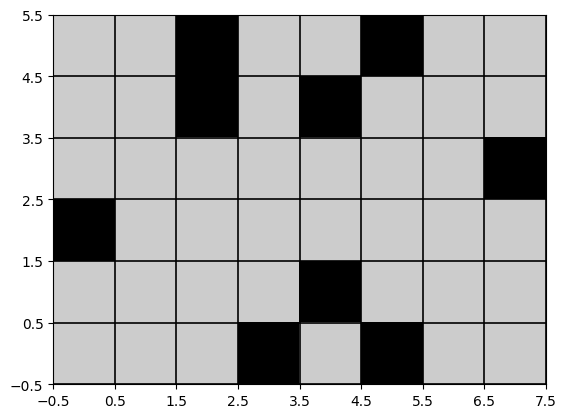

In [29]:
import matplotlib.colors as colors

def plot_grid():
    fig, ax = plt.subplots()
    cmap = colors.ListedColormap(['0.8', 'black']) 
    ax.imshow(grid, cmap=cmap, origin='lower')
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1.2)
    ax.set_xticks(np.arange(-.5, m, 1));
    ax.set_yticks(np.arange(-.5, n, 1));
    
plot_grid()

In [45]:
import networkx as nx
G = nx.grid_2d_graph(n, m)

In [46]:
# Delete nodes with obstacles
for i in range(n):
    for j in range(m):
        if position[i][j] == 1:  
            G.remove_node((i,j))
print(G.nodes())

[(0, 0), (0, 1), (0, 2), (0, 4), (0, 6), (0, 7), (1, 0), (1, 1), (1, 2), (1, 3), (1, 5), (1, 6), (1, 7), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 0), (4, 1), (4, 3), (4, 5), (4, 6), (4, 7), (5, 0), (5, 1), (5, 3), (5, 4), (5, 6), (5, 7)]


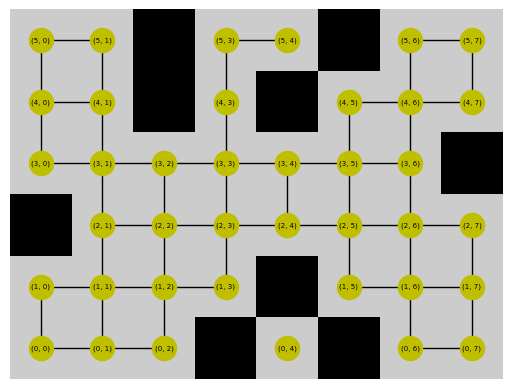

In [47]:
plot_grid()
pos = {node:(node[1], node[0]) for node in G.nodes()}
nx.draw(G, pos, font_size=5, with_labels=True, node_size=300, node_color="y")

In [33]:
start1 =  (5,0)
end1 = (0,7)

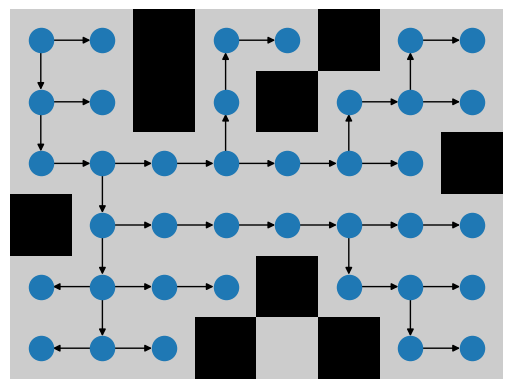

In [34]:
bfs = nx.bfs_tree(G, source=start1)
plot_grid()
nx.draw(bfs, pos=pos)

[(5, 0), (4, 0), (3, 0), (3, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (1, 5), (1, 6), (0, 6), (0, 7)]
[[-1.0, -2.5], [-1.0, -1.7999999999999998], [-1.0, -1.0999999999999996], [-0.30000000000000004, -1.0999999999999996], [-0.30000000000000004, -0.3999999999999999], [0.3999999999999999, -0.3999999999999999], [1.0999999999999996, -0.3999999999999999], [1.7999999999999998, -0.3999999999999999], [2.5, -0.3999999999999999], [2.5, 0.30000000000000004], [3.1999999999999993, 0.30000000000000004], [3.1999999999999993, 1.0], [3.8999999999999995, 1.0]]


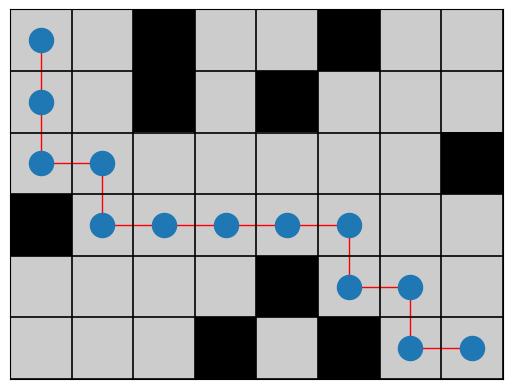

In [35]:
# Pick the last element and iterate through its predecessors
path = [end1]   # A path in a graph is a set of connected nodes
current = end1

# iterate through its predecessors until finding source node
while current != start1:
    # Predecesors of the current node        
    for pre in bfs.predecessors(current):
        current = pre
    # add the predecessor to the path
    path.append(pre)
    
# The current path starts in the goal node and ends at the start node. So we invert it
path = path[::-1]
route = list()

for i in range(len(path)):
    route.append(position[(path[i][0])][(path[i][1])])
print(path)
print(route)

# Edges of the path
E = [(path[i], path[i+1])for i in range(len(path)-1)]
plot_grid()
nx.draw_networkx_nodes(path, pos)
nx.draw_networkx_edges(G, edgelist=E, pos=pos, edge_color='r')

In [36]:
for i in range(len(route)):
    print(route[i])

[-1.0, -2.5]
[-1.0, -1.7999999999999998]
[-1.0, -1.0999999999999996]
[-0.30000000000000004, -1.0999999999999996]
[-0.30000000000000004, -0.3999999999999999]
[0.3999999999999999, -0.3999999999999999]
[1.0999999999999996, -0.3999999999999999]
[1.7999999999999998, -0.3999999999999999]
[2.5, -0.3999999999999999]
[2.5, 0.30000000000000004]
[3.1999999999999993, 0.30000000000000004]
[3.1999999999999993, 1.0]
[3.8999999999999995, 1.0]


In [41]:
start2 =  (0,0)
end2 = (0,7)

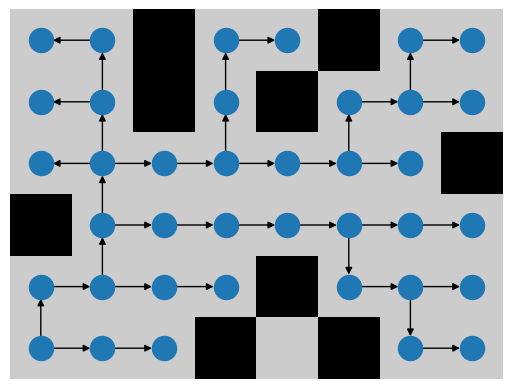

In [42]:
bfs = nx.bfs_tree(G, source=start2)
plot_grid()
nx.draw(bfs, pos=pos)

[(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (1, 5), (1, 6), (0, 6), (0, 7)]
[[-1.0, 1.0], [-1.0, 0.30000000000000004], [-0.30000000000000004, 0.30000000000000004], [-0.30000000000000004, -0.3999999999999999], [0.3999999999999999, -0.3999999999999999], [1.0999999999999996, -0.3999999999999999], [1.7999999999999998, -0.3999999999999999], [2.5, -0.3999999999999999], [2.5, 0.30000000000000004], [3.1999999999999993, 0.30000000000000004], [3.1999999999999993, 1.0], [3.8999999999999995, 1.0]]


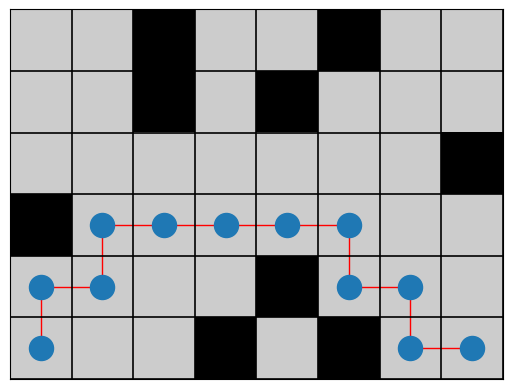

In [43]:
# Pick the last element and iterate through its predecessors
path = [end2]   # A path in a graph is a set of connected nodes
current = end2

# iterate through its predecessors until finding source node
while current != start2:
    # Predecesors of the current node        
    for pre in bfs.predecessors(current):
        current = pre
    # add the predecessor to the path
    path.append(pre)
    
# The current path starts in the goal node and ends at the start node. So we invert it
path = path[::-1]
route = list()

for i in range(len(path)):
    route.append(position[(path[i][0])][(path[i][1])])
print(path)
print(route)

# Edges of the path
E = [(path[i], path[i+1])for i in range(len(path)-1)]
plot_grid()
nx.draw_networkx_nodes(path, pos)
nx.draw_networkx_edges(G, edgelist=E, pos=pos, edge_color='r')

In [44]:
for i in range(len(route)):
    print(route[i])

[-1.0, 1.0]
[-1.0, 0.30000000000000004]
[-0.30000000000000004, 0.30000000000000004]
[-0.30000000000000004, -0.3999999999999999]
[0.3999999999999999, -0.3999999999999999]
[1.0999999999999996, -0.3999999999999999]
[1.7999999999999998, -0.3999999999999999]
[2.5, -0.3999999999999999]
[2.5, 0.30000000000000004]
[3.1999999999999993, 0.30000000000000004]
[3.1999999999999993, 1.0]
[3.8999999999999995, 1.0]


In [48]:
start3 =  (5,7)
end3 = (0,7)

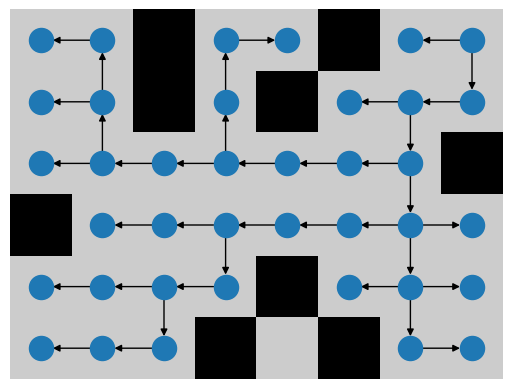

In [49]:
bfs = nx.bfs_tree(G, source=start3)
plot_grid()
nx.draw(bfs, pos=pos)

[(5, 7), (4, 7), (4, 6), (3, 6), (2, 6), (1, 6), (0, 6), (0, 7)]
[[3.8999999999999995, -2.5], [3.8999999999999995, -1.7999999999999998], [3.1999999999999993, -1.7999999999999998], [3.1999999999999993, -1.0999999999999996], [3.1999999999999993, -0.3999999999999999], [3.1999999999999993, 0.30000000000000004], [3.1999999999999993, 1.0], [3.8999999999999995, 1.0]]


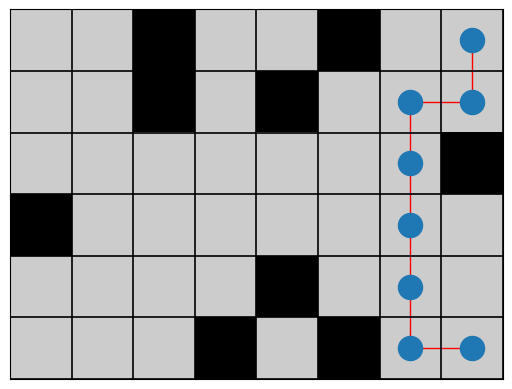

In [50]:
# Pick the last element and iterate through its predecessors
path = [end3]   # A path in a graph is a set of connected nodes
current = end3

# iterate through its predecessors until finding source node
while current != start3:
    # Predecesors of the current node        
    for pre in bfs.predecessors(current):
        current = pre
    # add the predecessor to the path
    path.append(pre)
    
# The current path starts in the goal node and ends at the start node. So we invert it
path = path[::-1]
route = list()

for i in range(len(path)):
    route.append(position[(path[i][0])][(path[i][1])])
print(path)
print(route)

# Edges of the path
E = [(path[i], path[i+1])for i in range(len(path)-1)]
plot_grid()
nx.draw_networkx_nodes(path, pos)
nx.draw_networkx_edges(G, edgelist=E, pos=pos, edge_color='r')

In [51]:
for i in range(len(route)):
    print(route[i])

[3.8999999999999995, -2.5]
[3.8999999999999995, -1.7999999999999998]
[3.1999999999999993, -1.7999999999999998]
[3.1999999999999993, -1.0999999999999996]
[3.1999999999999993, -0.3999999999999999]
[3.1999999999999993, 0.30000000000000004]
[3.1999999999999993, 1.0]
[3.8999999999999995, 1.0]
